<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
# Importing libraries for data, visualization and model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


In [4]:
# Data collection & loading
# Load the California Housing dataset and convert to a DataFrame. Also will provide status if fails.
# loading sklearn dataset. If when blocks downloads fall to synthetic
try:
    data = fetch_california_housing(as_frame=True, download_if_missing=False)
    df = data.frame.copy()
    print("Loaded sklearn California Housing dataset.")
except Exception as e:
    # fallback synthetic dataset with same feature names
    rng = np.random.RandomState(42)
    n = 20640
    MedInc = np.exp(rng.normal(1.5, 0.5, size=n))
    HouseAge = rng.randint(1, 52, size=n)
    AveRooms = rng.normal(5, 2, size=n).clip(1, 20)
    AveBedrms = rng.normal(1, 0.5, size=n).clip(0.3, 5)
    Population = rng.poisson(1000, size=n)
    AveOccup = rng.normal(3, 1, size=n).clip(0.5, 10)
    Latitude = rng.uniform(32, 42, size=n)
    Longitude = rng.uniform(-124, -114, size=n)
    MedHouseVal = (MedInc * 0.4) + (HouseAge * -0.01) + (AveRooms * 0.02) \
                  - (AveBedrms * 0.1) - (Population * 1e-4) + (42 - Latitude) * 0.02 \
                  + rng.normal(0, 0.5, size=n)
    df = pd.DataFrame({
        'MedInc': MedInc,
        'HouseAge': HouseAge,
        'AveRooms': AveRooms,
        'AveBedrms': AveBedrms,
        'Population': Population,
        'AveOccup': AveOccup,
        'Latitude': Latitude,
        'Longitude': Longitude,
        'MedHouseVal': MedHouseVal
    })
    print("Used synthetic dataset")


Used synthetic dataset


In [5]:
# Quick check of data
print("Rows,Cols:", df.shape)
display(df.head())
print("\nData types:\n", df.dtypes)
print("\nNull counts:\n", df.isnull().sum())

Rows,Cols: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.745156,29,4.144299,1.151102,1029,3.157901,39.740004,-121.837246,2.113506
1,4.182327,12,3.525816,1.291137,1065,3.723344,35.630017,-115.677615,1.958236
2,6.195630,13,3.965430,1.756335,994,2.927339,32.369411,-122.807976,2.531595
3,9.597618,11,6.267284,1.102098,937,1.472250,32.645672,-116.819767,3.565195
4,3.986539,31,1.163408,0.300000,1025,2.206862,35.063973,-117.819262,1.521748



Data types:
 MedInc         float64
HouseAge         int64
AveRooms       float64
AveBedrms      float64
Population       int64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Null counts:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


Null counts:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


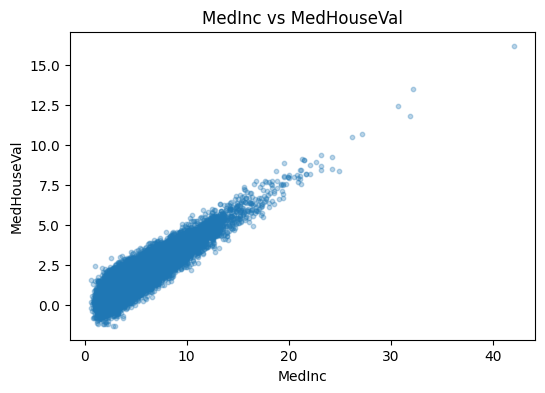

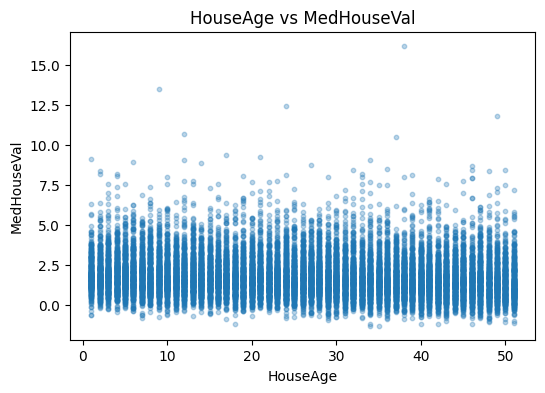

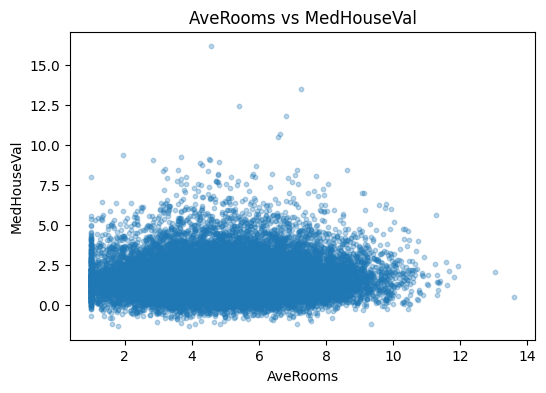

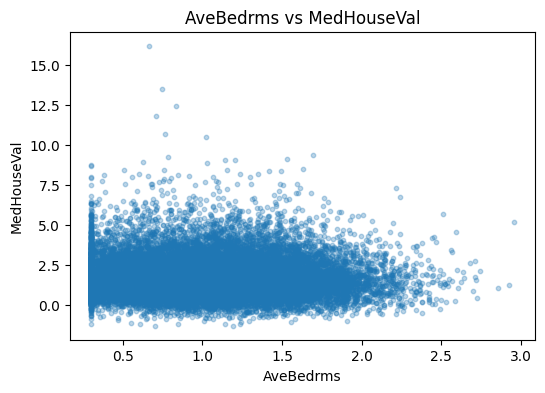

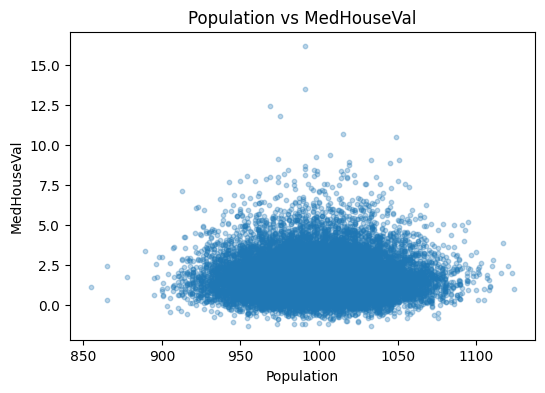

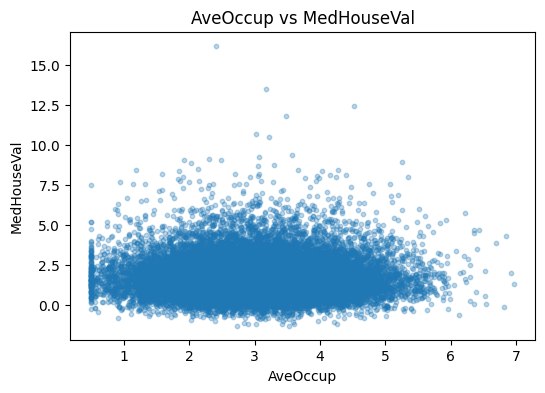

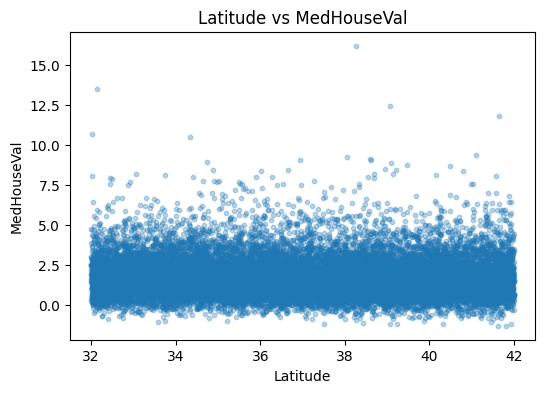

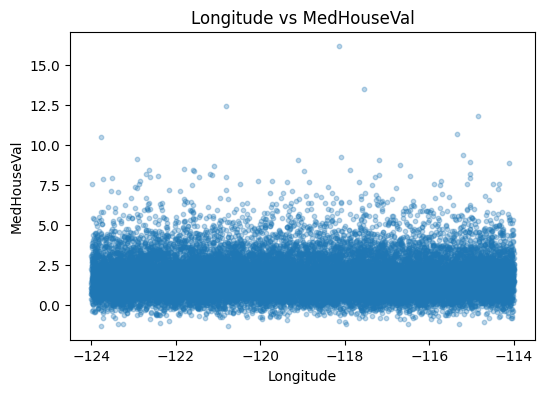

In [6]:
# EDA & Preprocessing
def scatter_all_features_vs_target(df, target, feature_list=None, figsize=(6,4)):
    if feature_list is None:
        feature_list = [c for c in df.columns if c != target]
    for feat in feature_list:
        plt.figure(figsize=figsize)
        plt.scatter(df[feat], df[target], alpha=0.3, s=10)
        plt.xlabel(feat)
        plt.ylabel(target)
        plt.title(f"{feat} vs {target}")
        plt.show()

# Run EDA visualizations:
print("Null counts:\n", df.isnull().sum())
scatter_all_features_vs_target(df, 'MedHouseVal')


In [7]:
# ML Model Training
# Now Splitting data and train a regression model
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
# Model Evaluation
# Have to compute RMSE and R on the test set
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R^2:  {r2:.4f}")

# Feature importances
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop feature importances:\n", feat_imp.head(10))


Test RMSE: 0.5197
Test R^2:  0.8195

Top feature importances:
 MedInc        0.833127
HouseAge      0.030285
Latitude      0.025744
AveRooms      0.023370
AveBedrms     0.023095
Longitude     0.022044
AveOccup      0.021856
Population    0.020478
dtype: float64


In [11]:
# Model Prediction - predict median house value for new inputs
# Have to now provide new feature inputs and predict MedHouseVal
sample_inputs = X_test.iloc[:3].copy()
sample_predictions = model.predict(sample_inputs)
print("Sample inputs:\n", sample_inputs)
print("\nPredicted MedHouseVal:\n", sample_predictions)

Sample inputs:
          MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
20046  3.147405        22  5.111459   0.300000         989  2.671314   
3024   1.759675        44  6.029412   2.024517        1036  4.175031   
15663  4.750657        23  2.422222   0.869071        1035  2.947486   

        Latitude   Longitude  
20046  39.442138 -116.010401  
3024   37.259253 -123.729674  
15663  35.833974 -114.988733  

Predicted MedHouseVal:
 [1.18585623 0.60784116 1.64819946]
